<p style="background-color:orange;font-family:newtimeroman;font-size:22px;line-height:1.7em;text-align:center;border-radius:5px 5px">Building a simple linear regression model for predicting weight of Adipose Tissue using waist circumference</p>


__RATNAPRIYA__ Email: rpdasc84@gmail.com

<p style="background-color:green;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Building a simple linear regression model for predicting weight of Adipose Tissue using waist circumference</p>

___Understanding the Data___:

__What is adipose tissue and how does it effect?__

    Adipose tissue is commonly known as body fat. It is found all over the body. It can be found under the skin (subcutaneous fat), packed around internal organs (visceral fat), between muscles, within bone marrow and in breast tissue. Men tend to store more visceral fat (fat around their internal organs), leading to obesity around the middle of their abdomen. However, women tend to store more subcutaneous fat within the buttocks and thighs. These differences are due to the sex hormones produced by males and females.
    
    Adipose tissue is now known to be a very important and active endocrine organ. It is well established that adipocytes (or fat cells) play a vital role in the storage and release of energy throughout the human body. More recently, the endocrine function of adipose tissue has been discovered. In addition to adipocytes, adipose tissue contains numerous other cells that are able to produce certain hormones in response to signals from the rest of the organs throughout the body. Through the actions of these hormones, adipose tissue plays an important role in the regulation of glucose, cholesterol and the metabolism of sex hormones.
    
__What could go wrong with adipose tissue?__

Both too much and too little adipose tissue can have severe health implications. More commonly, too much adipose tissue leads to obesity, mainly from too much visceral fat. Obesity leads to a number of serious health problems. Obesity increases the risk of developing type 2 diabetes as it causes the body to become resistant to insulin. This resistance results in high levels of blood sugar, which is bad for health. Obesity also increases the chance of developing high blood pressure, high cholesterol levels and an increased tendency for blood to clot. All of these raise the risk of heart attacks and stroke.

A lack of adipose tissue (lipodystrophy) can also cause similar problems and is seen with increasing frequency as a result of medication used to treat HIV/AIDS.

In eating disorders (such as anorexia nervosa), the patient does not eat enough food to maintain their adipose tissues levels. This means that they can lose a dangerous amount of body weight.

Info Source : https://www.yourhormones.info/glands/adipose-tissue/

In [1]:
# importing required libraries
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
ls

Audipose_tissue.png
Building a simple linear regression model for predicting weight of Adipose Tissu using waist circumference.ipynb
Simple_Linear_Regression(ADIPOSE_TISSUE).ipynb
audipose_vs_waist.png
wcat.csv


In [3]:
wcat = pd.read_csv("wcat.csv")
wcat.head()

,waist,audiposetissue
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


___Descriptive Analysis___

In [4]:
wcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   waist           109 non-null    float64
 1   audiposetissue  109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [5]:
wcat.describe().T.style.set_properties(**{'background-color': 'yellow','color': 'black','border-color': 'black'})

,count,mean,std,min,25%,50%,75%,max
waist,109.000000,91.901835,13.559116,63.500000,80.000000,90.800000,104.000000,121.000000
audiposetissue,109.000000,101.894037,57.294763,11.440000,50.880000,96.540000,137.000000,253.000000


In [6]:
wcat.isnull().sum()

waist             0
audiposetissue    0
dtype: int64

In [7]:
wcat.shape

(109, 2)

___Visual Analysis___

Text(0, 0.5, 'waist')

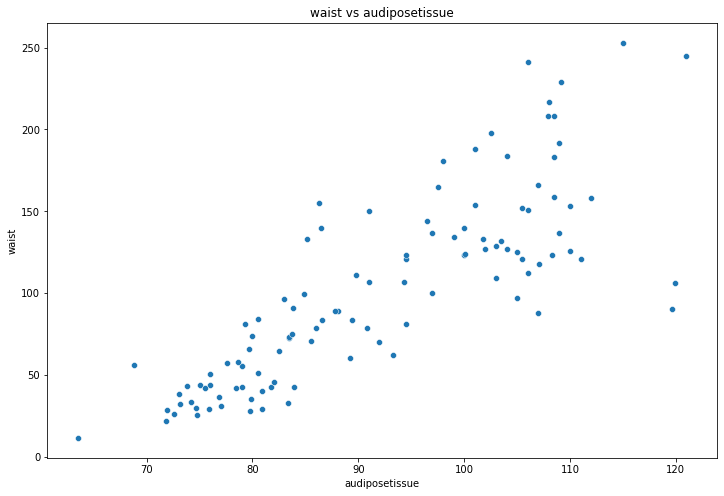

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=wcat, x="waist", y="audiposetissue")
plt.title('waist vs audiposetissue')
plt.xlabel('audiposetissue')
plt.ylabel('waist')

Text(0.5, 1.0, "Q-Q plot of 'audiposetissue'")

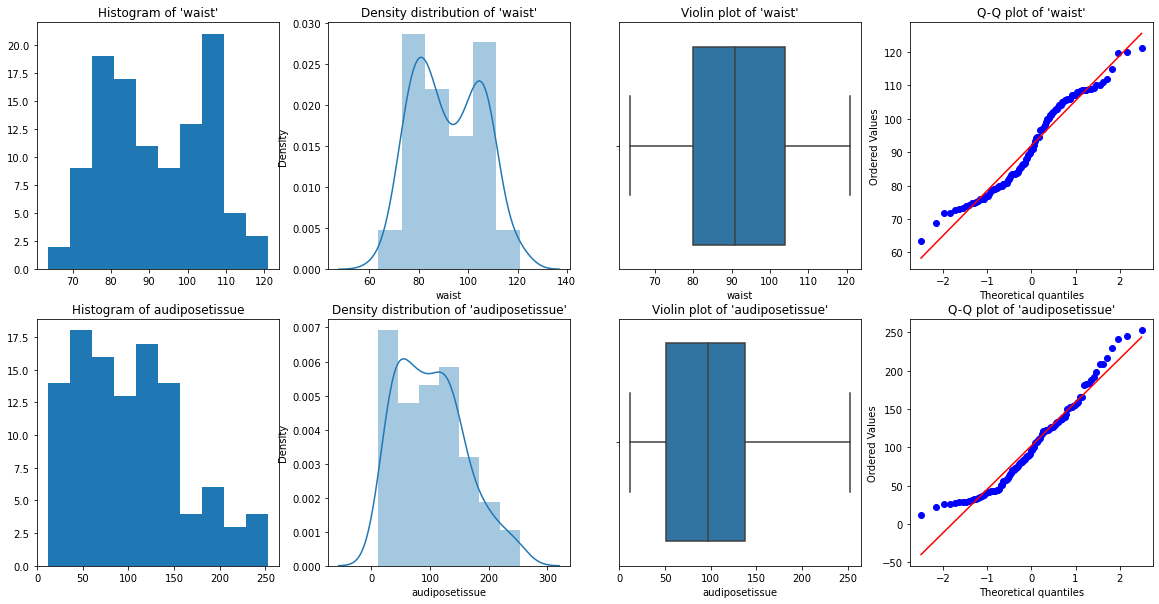

In [9]:
# Histogram
# We can use either plt.hist or sns.histplot
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(wcat['waist'], density=False)
plt.title("Histogram of 'waist'")
plt.subplot(2,4,5)
plt.hist(wcat['audiposetissue'], density=False)
plt.title("Histogram of audiposetissue")

# Density plot
plt.subplot(2,4,2)
sns.distplot(wcat['waist'], kde=True)
plt.title("Density distribution of 'waist'")
plt.subplot(2,4,6)
sns.distplot(wcat['audiposetissue'], kde=True)
plt.title("Density distribution of 'audiposetissue'")

# boxplot or violin plot
# A violin plot is a method of plotting numeric data. It is similar to a box plot, 
# with the addition of a rotated kernel density plot on each side
plt.subplot(2,4,3)
sns.boxplot(wcat['waist'])
plt.title("Violin plot of 'waist'")
plt.subplot(2,4,7)
sns.boxplot(wcat['audiposetissue'])
plt.title("Violin plot of 'audiposetissue'")

from scipy.stats import probplot

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(wcat['waist'], plot=plt)
plt.title("Q-Q plot of 'waist'")
plt.subplot(2,4,8)
probplot(wcat['audiposetissue'], plot=plt)
plt.title("Q-Q plot of 'audiposetissue'")

<AxesSubplot:title={'center':'Line plot of waist, audiposetissue'}, xlabel='waist', ylabel='audiposetissue'>

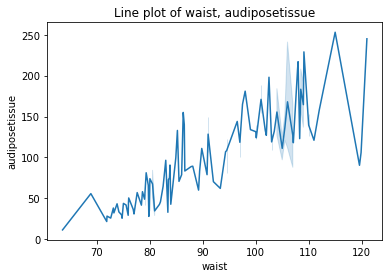

In [10]:
plt.title("Line plot of waist, audiposetissue")
sns.lineplot(data=wcat, x="waist", y="audiposetissue")

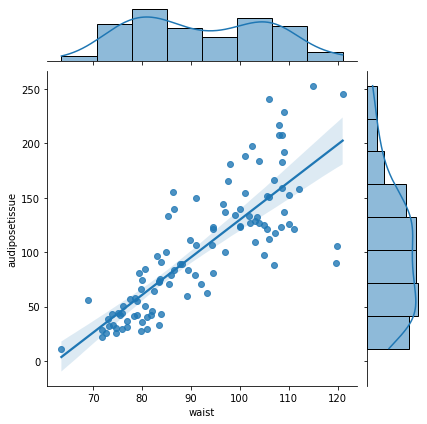

In [11]:
sns.jointplot(data = wcat, x = "waist", y = "audiposetissue", kind = "reg")

<AxesSubplot:>

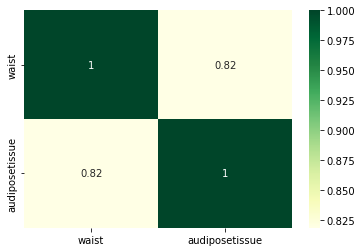

In [12]:
wcat.corr()
sns.heatmap(wcat.corr(), annot=True, cmap="YlGn")

___Train_Test_Split___

In [13]:
wcat["waist"]

0       74.75
1       72.60
2       81.80
3       83.95
4       74.65
        ...  
104    100.10
105     93.30
106    101.80
107    107.90
108    108.50
Name: waist, Length: 109, dtype: float64

In [14]:
x = wcat[["waist"]]
y = wcat[["audiposetissue"]]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, train_size = .70, shuffle = True, random_state = 77)

In [16]:
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((76, 1), (76, 1), (33, 1), (33, 1))

__MODEL BUILDING__

In [17]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [18]:
model = slr.fit(x_train,y_train)

In [19]:
y_pred = slr.predict(x_test)
y_pred

array([[ 31.01297594],
       [162.22319163],
       [144.56367404],
       [ 45.49378036],
       [ 43.90442378],
       [ 45.67037554],
       [123.37225294],
       [  1.52158157],
       [ 54.85332469],
       [ 77.10431685],
       [ 79.22345896],
       [ 94.41064409],
       [169.28699867],
       [200.72093998],
       [119.84034942],
       [ 92.99788268],
       [130.43605997],
       [204.60603385],
       [149.86152932],
       [ 56.26608609],
       [ 35.42785534],
       [172.81890219],
       [158.69128812],
       [ 58.73841856],
       [121.60630118],
       [183.41461274],
       [ 57.32565715],
       [149.86152932],
       [110.30420992],
       [ 61.56394137],
       [ 92.29150198],
       [139.26581877],
       [155.1593846 ]])

___Calculating Regression Metrics___

In [20]:
# Checking the MSE
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

1210.7209363175991

In [21]:
# Checking the R2 value
r2_score = r2_score(y_test, y_pred)
r2_score

0.6811725921277993

In [22]:
from sklearn.metrics import r2_score
# Checking the Ajusted_R2 value
R2 = r2_score(y_test, y_pred)
n = 109
p = 1
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)      # n = number of observation, p = number of features
Adj_r2

0.6781928967271246

In [23]:
# Checking the Root Mean Square Error value
import math  
rmse = math.sqrt(mse)
rmse

34.79541544970543

___Regression using statsmodels.api___

In [24]:
import numpy as np
import statsmodels.api as sm

In [25]:
exog = sm.add_constant(x, prepend=False)

In [26]:
mod = sm.OLS(y,x)

In [27]:
res = mod.fit()

In [28]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:         audiposetissue   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              607.5
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                    3.76e-46
Time:                        22:51:35   Log-Likelihood:                         -570.47
No. Observations:                 109   AIC:                                      1143.
Df Residuals:                     108   BIC:                                      1146.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

___CONCLUSION___

- Inthis project I got R-Square value closer to 1, this means the modelfits well.
- To imporve model performance We need more data.